In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 817.8 kB/s eta 0:00:000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=dc15a024a51f4539b51940f4a796f0b617ddba8aa35ad7eb2bc476a447affac1
  Stored in directory: /Users/soukaina/Library/Caches/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Step 2: Data Collection
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/soukaina/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Data Preprocessing
# Check for missing values #Handle Missing Data:
#If there are any missing values, handle them appropriately.
df.isnull().sum()

# Fill missing values or drop rows/columns if necessary
df.dropna(inplace=True)



In [9]:
#Encoding Categorical Variables:
#Convert categorical variables into numerical formats (One-Hot Encoding).
df_encoded = pd.get_dummies(df, drop_first=True)


In [11]:
#Train-Test Split:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


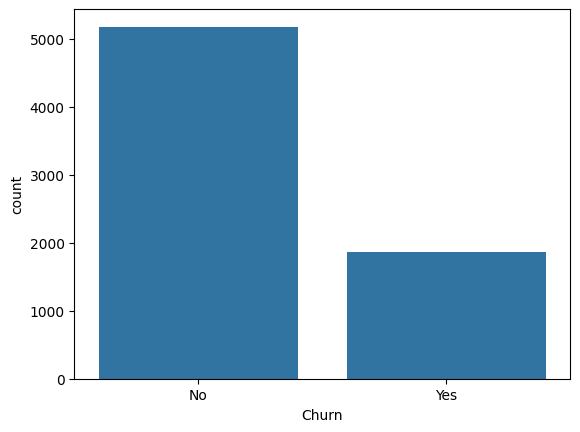

In [13]:
#Step 4: Exploratory Data Analysis (EDA)
#Conduct a quick exploration of the dataset to understand feature, 
#distributions, correlations, and any insights into churn behavior.
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.show()



In [15]:
#Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# Cross-validation to compare models
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Logistic Regression CV Accuracy: ", log_scores.mean())
print("Random Forest CV Accuracy: ", rf_scores.mean())


Logistic Regression CV Accuracy:  0.8004980291599226
Random Forest CV Accuracy:  0.7916214474051262


In [19]:
#Model training
# Fit the random forest model (since it's better for larger datasets)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
#Model tuning
from sklearn.model_selection import GridSearchCV

# Set hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
#Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy and report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.74
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      1036
        True       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

ROC AUC Score: 0.50


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
#Model Interpretation
# Feature importance for Random Forest
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                             Feature  Importance
1                             tenure    0.084377
2                     MonthlyCharges    0.056568
7069  PaymentMethod_Electronic check    0.026335
7066               Contract_Two year    0.019382
7054              OnlineSecurity_Yes    0.018596
...                              ...         ...
7861            TotalCharges_1426.75    0.000000
7859             TotalCharges_1426.4    0.000000
1734           customerID_2521-NPUZR    0.000000
7857            TotalCharges_1424.95    0.000000
8349             TotalCharges_1756.6    0.000000

[13601 rows x 2 columns]


In [29]:
#Deployment
from flask import Flask, request, jsonify
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'churn_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = grid_search.best_estimator_.predict([data])
    return jsonify({'churn_prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [35]:
#Deployment
from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('churn_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    
    # Convert input data to DataFrame
    input_df = pd.DataFrame([data])
    
    # One-hot encode the input data
    input_df_encoded = pd.get_dummies(input_df, drop_first=True)
    
    # Align columns with training data
    input_df_encoded = input_df_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Make the prediction
    prediction = model.predict(input_df_encoded)

    return jsonify({'churn_prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [45]:
python your_flask_app.py


SyntaxError: invalid syntax (4252227481.py, line 1)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

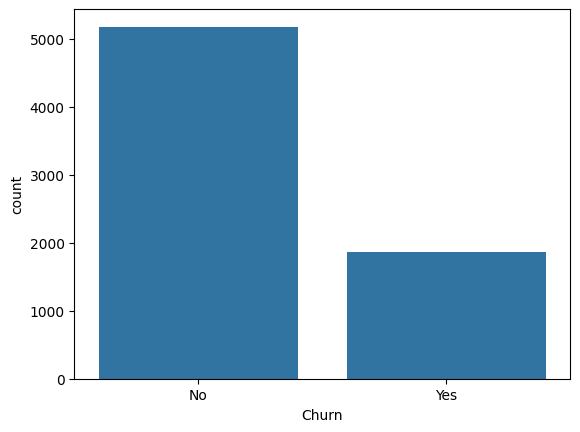

Logistic Regression CV Accuracy:  0.8004980291599226
Random Forest CV Accuracy:  0.7925101772889247
Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.74
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      1036
        True       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

ROC AUC Score: 0.50
                             Feature  Importance
1                             tenure    0.087638
7069  PaymentMethod_Electronic check    0.049276
7051     InternetService_Fiber optic    0.042788
7066               Contract_Two year    0.042409
7054              OnlineSecurity_Yes    0.037316
...                              ...         ...
6486           customerID_9184-GALIL    0.000000
6487           customerID_9185-TQCVP    0.000000
6488      

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 * Running on http://127.0.0.1:5000
P

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [47]:
# Step 2: Data Collection
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/soukaina/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
print(df.head())

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop rows/columns if necessary
df.dropna(inplace=True)

# Encoding Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Train-Test Split
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.show()

# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# Cross-validation to compare models
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Logistic Regression CV Accuracy: ", log_scores.mean())
print("Random Forest CV Accuracy: ", rf_scores.mean())

# Model training
rf.fit(X_train, y_train)

# Model tuning
from sklearn.model_selection import GridSearchCV

# Set hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy and report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Feature importance for Random Forest
importances = grid_search.best_estimator_.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)

#Deployment
from flask import Flask, request, jsonify
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'churn_model.pkl')

app = Flask(__name__)

# Load the model
model = joblib.load('churn_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json(force=True)
    
    # Convert input data into a DataFrame
    input_data = pd.DataFrame([data])
    
    # Make prediction
    prediction = model.predict(input_data)
    
    return jsonify({'churn_prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


In [49]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [53]:
# Check the columns after one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)


In [64]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('churn_model.pkl')
# List of features the model was trained with
model_columns = model.feature_names_in_
# Preprocess the input data by applying pd.get_dummies
def preprocess_input(input_data):
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame([input_data])
     # Apply one-hot encoding
    input_df_encoded = pd.get_dummies(input_df, drop_first=True)
     # Ensure all columns that were used in training are present in the input
    input_df_encoded = input_df_encoded.reindex(columns=model_columns, fill_value=0)
    return input_df_encoded

# Create a function to make predictions
def predict_churn(input_data):
    # Preprocess the input data to match the format used during training
    input_df = preprocess_input(input_data)
      # Make prediction
    prediction = model.predict(input_df)
    return int(prediction[0])

# Define your input features
input_data = {
    'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No',
    'tenure': 39, 'PhoneService': 'Yes', 'MultipleLines': 'No', 'InternetService': 'DSL',
    'OnlineSecurity': 'Yes', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No',
    'StreamingTV': 'Yes', 'StreamingMovies': 'No','Contract': 'Month-to-month','PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check', 'MonthlyCharges': 45.3,'TotalCharges': 563.75 }
# Make the prediction
churn_prediction = predict_churn(input_data)
# Output the prediction
if churn_prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is likely to stay.")

The customer is likely to stay.
